In [1]:
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import seaborn as sns
import random, os
import numpy as np
import zipfile
from archetypal import IDF
pd.set_option('display.max_columns', None)
data_dir = 'C:/Users/mmh/Documents/Data/'
data_dir2 = "C:/Users/mmh/OneDrive - Oak Ridge National Laboratory/Melrose/9.Data/"
data_maps = 'C:/Users/mmh/OneDrive - Oak Ridge National Laboratory/Melrose/8.Maps/'

c:\Users\mmh\Anaconda3\envs\py39sim\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package energy-pandas is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [27]:
param = 'downtown'
if param == 'downtown':
    selected_ID = gpd.read_file(data_dir+"Buildings/GA/Atlanta downtown_53.shp")
    out_dir_new = data_dir+'Buildings/OUT/'
    out_dir_old = out_dir = data_dir+'Buildings/OUT_Original/'
elif param == 'rural':
    selected_ID = gpd.read_file(data_dir+"Buildings/GA/Fulton rural.shp")
    out_dir_new= data_dir+'Buildings/OUT_2/'
    out_dir_old = data_dir+'Buildings/OUT_Original_2/'

In [3]:
GA_shp = gpd.read_file(data_maps+'geo/tl_2020/tl_2020_13_tract.zip', index_col=False)
GA_shp.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,13,099,090500,13099090500,905,Census Tract 905,G5020,S,340970567,3670838,+31.1995791,-084.9937511,"POLYGON ((-85.11460 31.27733, -85.11449 31.277..."
1,13,099,090400,13099090400,904,Census Tract 904,G5020,S,202255980,924285,+31.3138364,-084.8929190,"POLYGON ((-84.99042 31.27632, -84.99037 31.277..."


In [28]:
selected_ID['GEOID_2'] = selected_ID['GEOID'].str[0:11]
selected_ID['BuildingClass'] = 'Commercial'
selected_ID.loc[selected_ID.BuildingTy.isin(['MidriseApartment','HighriseApartment','IECC']),'BuildingClass'] = 'Residential'
selected_ID.loc[selected_ID.BuildingTy.isin(['SmallOffice','MediumOffice','LargeOffice',
                                              'PrimarySchool','SecondarySchool']),'BuildingClass'] = 'Industrial'
selected_ID.head()

,ID,Centroid,Footprint2,State,Area,Area2D,Height_m,NumFloors,WWR_surfac,CZ,BuildingTy,Standard,lat,lon,.points,index_righ,City,latitude,longitude,index__rig,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,BuildingCl,STATEFP_2,COUNTYFP_2,TRACTCE_2,BLKGRPCE_2,GEOID_2,NAMELSAD_2,MTFCC_2,FUNCSTAT_2,ALAND_2,AWATER_2,INTPTLAT_2,INTPTLON_2,geometry,BuildingClass
0,5009016211529,33.77035940131476/-84.39764653348597,33.770349/-84.397652_33.769783/-84.397651_33.7...,GA,1.646939e+06,49907.257085,99.103099,33.0,.33_.33_.33_.33_.33_.33_.33_.33_.33_.33_.33_.3...,3A,HighriseApartment,DOE-Ref-1980-2004,33.770359,-84.397647,POINT (-84.39764653348597 33.77035940131476),0,Fulton,33.77035940131476,-84.39764653348597,533,13,121,002100,3,131210021003,Block Group 3,G5030,S,274076,0,+33.7690747,-084.3962822,Residential,13,121,002100,3,13121002100,Block Group 3,G5030,S,274076,0,+33.7690747,-084.3962822,MULTIPOINT (-84.39765 33.77036),Residential
1,5009016211541,33.75776830777969/-84.3884800598176,33.757433/-84.388577_33.757701/-84.388826_33.7...,GA,9.415313e+05,28531.251406,131.290198,33.0,.38_.38_.38_.38_.38_.38_.38_.38,3A,LargeOffice,DOE-Ref-1980-2004,33.757768,-84.388480,POINT (-84.3884800598176 33.75776830777969),0,Fulton,33.75776830777969,-84.3884800598176,59,13,121,011901,1,131210119011,Block Group 1,G5030,S,357933,0,+33.7568514,-084.3907076,Industrial,13,121,011901,1,13121011901,Block Group 1,G5030,S,357933,0,+33.7568514,-084.3907076,MULTIPOINT (-84.38848 33.75777),Industrial
2,5009016211559,33.75186568810931/-84.40198835784973,33.751603/-84.402202_33.751771/-84.402274_33.7...,GA,7.362049e+04,14724.098387,18.049033,5.0,.33_.33_.33_.33_.33_.33_.33_.33_.33_.33_.33_.3...,3A,MediumOffice,DOE-Ref-1980-2004,33.751866,-84.401988,POINT (-84.40198835784973 33.75186568810931),0,Fulton,33.75186568810931,-84.40198835784973,344,13,121,003600,2,131210036002,Block Group 2,G5030,S,199130,0,+33.7517201,-084.4010599,Industrial,13,121,003600,2,13121003600,Block Group 2,G5030,S,199130,0,+33.7517201,-084.4010599,MULTIPOINT (-84.40199 33.75187),Industrial
3,5009016211568,33.76168036786366/-84.38831414996665,33.761616/-84.388929_33.762184/-84.388911_33.7...,GA,3.823439e+06,119482.457377,97.165139,32.0,.33_.33_.33_.33_.33_.33_.33_.33_.33_.33_.33_.3...,3A,HighriseApartment,DOE-Ref-1980-2004,33.761680,-84.388314,POINT (-84.38831414996665 33.76168036786366),0,Fulton,33.76168036786366,-84.38831414996665,61,13,121,001902,1,131210019021,Block Group 1,G5030,S,325588,0,+33.7653987,-084.3889065,Residential,13,121,001902,1,13121001902,Block Group 1,G5030,S,325588,0,+33.7653987,-084.3889065,MULTIPOINT (-84.38831 33.76168),Residential
4,5009016211571,33.738934932906055/-84.4110848243066,33.738363/-84.412256_33.73911/-84.412226_33.73...,GA,2.635379e+05,263537.936441,9.750734,1.0,.006_.006_.006_.006_.006_.006_.006_.006_.006_....,3A,Warehouse,DOE-Ref-1980-2004,33.738935,-84.411085,POINT (-84.4110848243066 33.73893493290606),0,Fulton,33.738934932906055,-84.4110848243066,3134,13,121,005800,1,131210058001,Block Group 1,G5030,S,1256443,0,+33.7318610,-084.4105985,Commercial,13,121,005800,1,13121005800,Block Group 1,G5030,S,1256443,0,+33.7318610,-084.4105985,MULTIPOINT (-84.41108 33.73893),Commercial


# Analysis 100 BG

In [5]:
# # out_dir = data_dir+'Buildings/OUT/'
# out_dir = data_dir+'Buildings/OUT_2/'
# i = 0
# for file in os.listdir(out_dir):
#     if file.endswith("mtr.csv"):       
#         elec = pd.read_csv(out_dir + file)
#         elec['ID'] = file
#         elec['scenario'] = 'OD informed'
#         # elec_new = pd.concat([elec_new,elec])
#         elec['Date/Time'] = elec['Date/Time'].str.replace('24:00:00','00:00:00')
#         elec['Date/Time'] = pd.to_datetime('2019/' + elec['Date/Time'])
#         elec['Month'] = elec['Date/Time'].dt.month
#         elec['Day'] = elec['Date/Time'].dt.day
#         elec['Hour'] = elec['Date/Time'].dt.hour
#         elec.to_feather(out_dir+file[0:13]+'mtr.feather')
#         print("Finish file "+str(i)+": "+file)
#         i = i + 1

In [6]:
# # out_dir = data_dir+'Buildings/OUT_Original/'
# out_dir = data_dir+'Buildings/OUT_Original_2/'
# i = 0
# for file in os.listdir(out_dir):
#     if file.endswith("mtr.csv"):       
#         elec = pd.read_csv(out_dir + file)
#         elec['ID'] = file
#         elec['scenario'] = 'DOE Reference'
#         # elec_new = pd.concat([elec_new,elec])
#         elec['Date/Time'] = elec['Date/Time'].str.replace('24:00:00','00:00:00')
#         elec['Date/Time'] = pd.to_datetime('2019/' + elec['Date/Time'])
#         elec['Month'] = elec['Date/Time'].dt.month
#         elec['Day'] = elec['Date/Time'].dt.day
#         elec['Hour'] = elec['Date/Time'].dt.hour
#         elec.to_feather(out_dir+file[0:13]+'mtr.feather')
#         print("Finish file "+str(i)+": "+file)
#         i = i + 1

In [7]:
2785 / (2785+2295+916)

0.46447631754503

In [8]:
1277 / (1277+1095+329)

0.47278785634950016

# Segmentation

## commute - ACS

In [29]:
df = pd.read_csv(data_dir2+"ACS/commute time_Fulton_tract_2020/ACSST5Y2020.S0801-Data.csv")
df = df.iloc[1:,]
df['GEOID'] = df['GEO_ID'].str[9:]
df['S0801_C01_046E'] = pd.to_numeric(df['S0801_C01_046E'],errors='coerce')
df = df.rename(columns = {'S0801_C01_046E':'EST'})
df = df[['GEOID','EST']]
df.head()

,GEOID,EST
1,13121000100,21.7
2,13121000201,23.4
3,13121000202,22.8
4,13121000400,21.0
5,13121000501,21.7


In [30]:
med_commute = df['EST'].median()
med_commute

28.7

In [31]:
tmp = selected_ID[['GEOID_2']].drop_duplicates()
tmp = pd.merge(tmp,GA_shp[['GEOID','geometry']],how='left',left_on='GEOID_2',right_on='GEOID')
tmp = pd.merge(tmp,df,on='GEOID',how='left')
print(len(tmp))
# med_commute = tmp['EST'].median()
tmp = gpd.GeoDataFrame(tmp[['GEOID', 'EST']], geometry=tmp['geometry'])
# Function to find the nearest Residence with a non-missing 'EST' value
def find_nearest_est(row, points):
    # Exclude the current row's Residence and rows with missing 'EST'
    possible_residences = points.loc[(points['GEOID'] != row['GEOID']) & ~points['EST'].isnull()]
    # Find the nearest Residence
    nearest_residence = possible_residences.iloc[points.geometry.distance(row.geometry).idxmin()]
    # Return the 'EST' value of the nearest Residence
    return nearest_residence['EST']

# Apply the function to impute missing 'EST' values
tmp['EST'] = tmp.apply(lambda row: row['EST'] if not pd.isnull(row['EST']) else find_nearest_est(row, tmp), axis=1)
tmp.head()

30


,GEOID,EST,geometry
0,13121002100,21.6,"POLYGON ((-84.40021 33.77074, -84.39996 33.770..."
1,13121011901,20.8,"POLYGON ((-84.39432 33.75896, -84.39383 33.759..."
2,13121003600,28.9,"POLYGON ((-84.40656 33.75127, -84.40656 33.751..."
3,13121001902,26.0,"POLYGON ((-84.39055 33.76098, -84.39055 33.762..."
4,13121005800,28.4,"POLYGON ((-84.41687 33.72802, -84.41585 33.729..."


In [32]:
med_commute = tmp['EST'].median()
long_commute = tmp.loc[(tmp.EST>med_commute),'GEOID'].values
long_commute_ID = selected_ID.loc[(selected_ID.GEOID_2.isin(long_commute))&(selected_ID.BuildingClass=='Residential'),'ID'].values
short_commute = tmp.loc[(tmp.EST<=med_commute),'GEOID'].values
short_commute_ID = selected_ID.loc[(selected_ID.GEOID_2.isin(short_commute))&(selected_ID.BuildingClass=='Residential'),'ID'].values
print(len(long_commute))
print(len(long_commute_ID))
print(len(short_commute))
print(len(short_commute_ID))

15
3036
15
1837


In [33]:
med_commute

26.1

## ACS low-income

In [12]:
tmp = pd.read_csv(data_dir2+'ACS/income_Fulton_2020_tract/ACSDT5Y2020.B19013-Data.csv')
tmp = tmp.iloc[1:,]
tmp['GEOID'] = tmp['GEO_ID'].str[9:]
bg = selected_ID[['GEOID_2']].drop_duplicates().rename(columns={'GEOID_2':'GEOID'})
tmp = pd.merge(bg,tmp,on='GEOID',how='left')
print(len(tmp))
tmp['B19013_001E'] = pd.to_numeric(tmp['B19013_001E'], errors='coerce')
tmp.head()

11


,GEOID,GEO_ID,NAME,B19013_001E,B19013_001M,Unnamed: 4
0,13121010402,1400000US13121010402,"Census Tract 104.02, Fulton County, Georgia",57295,14686,NaN
1,13121010309,1400000US13121010309,"Census Tract 103.09, Fulton County, Georgia",88308,16614,NaN
2,13121010540,1400000US13121010540,"Census Tract 105.40, Fulton County, Georgia",83030,79109,NaN
3,13121010534,1400000US13121010534,"Census Tract 105.34, Fulton County, Georgia",42398,9272,NaN
4,13121010520,1400000US13121010520,"Census Tract 105.20, Fulton County, Georgia",57378,20304,NaN


In [13]:
med_inc = tmp['B19013_001E'].median()
high_inc = tmp.loc[(tmp.B19013_001E>med_inc),'GEOID'].values
high_inc_ID = selected_ID.loc[(selected_ID.GEOID_2.isin(high_inc))&(selected_ID.BuildingClass=='Residential'),'ID'].values
low_inc = tmp.loc[(tmp.B19013_001E<=med_inc),'GEOID'].values
low_inc_ID = selected_ID.loc[(selected_ID.GEOID_2.isin(low_inc))&(selected_ID.BuildingClass=='Residential'),'ID'].values
print(len(high_inc))
print(len(high_inc_ID))
print(len(low_inc))
print(len(low_inc_ID))

5
453
6
1296


# New vs Old

In [60]:
residential_ID = selected_ID.loc[(selected_ID.BuildingClass=='Residential'),'ID'].values

In [58]:
out_dir = out_dir_new
k = 1
files = os.listdir(out_dir)
files = [file for file in files if file.endswith("mtr.feather")]
f = files[827]
i = int(f[0:13])
elec_tmp = pd.read_feather(out_dir+str(i)+'mtr.feather')
elec_tmp = elec_tmp.groupby(['Month','Day','Hour']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_tmp['Electricity:Facility [J](TimeStep)'] = elec_tmp['Electricity:Facility [J](TimeStep)']/(3.6 * 10**6)
print(elec_tmp['Electricity:Facility [J](TimeStep)'].mean())
# # print(elec_tmp['Electricity:Facility [J](TimeStep)'].sum()/156e9)
elec_tmp.head()

0.8347333449885301


,Month,Day,Hour,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,1,1,0,0.266903,3.527280e+06
1,1,1,1,0.310569,2.834701e+06
2,1,1,2,0.217767,2.665652e+06
3,1,1,3,0.291409,2.605113e+06
4,1,1,4,0.222653,2.526849e+06


In [74]:
out_dir = out_dir_new
k = 1
files = os.listdir(out_dir)
files = [file for file in files if file.endswith("mtr.feather")]
for f in files:
    i = int(f[0:13])
    if i in residential_ID:
        elec_tmp = pd.read_feather(out_dir+str(i)+'mtr.feather')
        if k == 1:
            elec_all = elec_tmp.copy()
            elec_all = elec_all[['Date/Time','Month','Day','Hour','Electricity:Facility [J](TimeStep)','NaturalGas:Facility [J](TimeStep)']]
        else:
            elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']+elec_tmp['Electricity:Facility [J](TimeStep)']
            elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']+elec_tmp['NaturalGas:Facility [J](TimeStep)']
        k = k + 1
        print(str(k)+": "+str(round(np.mean(elec_all['Electricity:Facility [J](TimeStep)'])/1000,2)))

elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['category'] = 'OD Informed' 
elec_all = elec_all.groupby(['Month','Day','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_all = elec_all.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_new = elec_all.copy()
elec_new.head()

2: 96830.19
3: 105218.27
4: 108821.21
5: 109849.85
6: 117234.39
7: 130568.29
8: 138434.26
9: 142503.02
10: 145243.15
11: 151893.42
12: 161238.6
13: 162926.67
14: 164958.58
15: 170709.26
16: 173688.0
17: 175631.34
18: 178920.45
19: 182598.46
20: 183579.08
21: 188789.61
22: 192381.84
23: 195092.81
24: 197973.27
25: 219293.16
26: 229440.94
27: 232852.57
28: 248528.89
29: 262974.56
30: 267057.36
31: 270343.71
32: 289264.27
33: 316915.98
34: 334995.53
35: 338145.77
36: 341808.49
37: 342877.88
38: 345894.95
39: 355168.02
40: 365573.58
41: 367716.13
42: 369510.84
43: 401613.76
44: 407134.11
45: 422977.34
46: 426183.44
47: 435448.88
48: 439799.99
49: 457861.42
50: 458446.36
51: 478631.61
52: 482567.23
53: 502821.66
54: 506714.54
55: 530981.08
56: 535294.72
57: 541401.55
58: 560061.68
59: 576498.6
60: 580921.81
61: 599710.56
62: 603170.8
63: 606807.31
64: 618643.94
65: 626884.78
66: 632424.76
67: 654693.46
68: 662862.04
69: 664537.02
70: 720597.66
71: 742708.78
72: 764432.53
73: 799274.67
74: 8

,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,0,OD Informed,3.204709,3.114225
1,1,OD Informed,3.025459,3.324480
2,2,OD Informed,2.937637,3.527365
3,3,OD Informed,3.141960,3.699858
4,4,OD Informed,3.839142,3.752910


In [75]:
out_dir = out_dir_old
k = 1
files = os.listdir(out_dir)
files = [file for file in files if file.endswith("mtr.feather")]
for f in files:
    i = int(f[0:13])
    if i in residential_ID:
        elec_tmp = pd.read_feather(out_dir+str(i)+'mtr.feather')
        if k == 1:
            elec_all = elec_tmp.copy()
            elec_all = elec_all[['Date/Time','Month','Day','Hour','Electricity:Facility [J](TimeStep)','NaturalGas:Facility [J](TimeStep)']]
        else:
            elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']+elec_tmp['Electricity:Facility [J](TimeStep)']
            elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']+elec_tmp['NaturalGas:Facility [J](TimeStep)']
        k = k + 1
        print(k)
elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['category'] = 'DOE Reference'
elec_all = elec_all.groupby(['Month','Day','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_all = elec_all.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_old = elec_all.copy()
elec_old.head()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,0,DOE Reference,3.286523,2.978304
1,1,DOE Reference,3.086266,3.215443
2,2,DOE Reference,2.997716,3.417271
3,3,DOE Reference,3.209995,3.588755
4,4,DOE Reference,3.953492,3.630952


Text(0.5, 0, 'Hour of day')

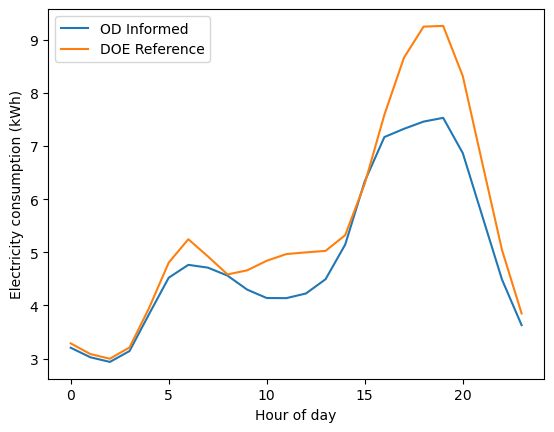

In [76]:
elec_all = pd.concat([elec_new,elec_old])
sns.lineplot(data = elec_all,x='Hour',y='Electricity:Facility [J](TimeStep)',hue='category',ci=None)
# plt.ylim(0,1.5e8)
# plt.ylim(0,10)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.ylabel('Electricity consumption (kWh)')
plt.xlabel('Hour of day')

In [118]:
dif = np.abs(elec_new['Electricity:Facility [J](TimeStep)'] - elec_old['Electricity:Facility [J](TimeStep)'])/elec_old['Electricity:Facility [J](TimeStep)']
np.mean(dif)

0.08837732773158792

# New

In [34]:
out_dir = out_dir_new
k = 1
files = os.listdir(out_dir)
files = [file for file in files if file.endswith("mtr.feather")]
for f in files:
    i = int(f[0:13])
    if i in long_commute_ID: # long_commute_ID
        elec_tmp = pd.read_feather(out_dir+str(i)+'mtr.feather')
        if k == 1:
            elec_all = elec_tmp.copy()
            elec_all = elec_all[['Date/Time','Month','Day','Hour','Electricity:Facility [J](TimeStep)','NaturalGas:Facility [J](TimeStep)']]
        else:
            elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']+elec_tmp['Electricity:Facility [J](TimeStep)']
            elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']+elec_tmp['NaturalGas:Facility [J](TimeStep)']
        k = k + 1
        print(str(k)+": "+str(round(np.mean(elec_all['Electricity:Facility [J](TimeStep)'])/1000,2)))

elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['category'] = 'long commuter' # long commute
elec_all = elec_all.groupby(['Month','Day','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_all = elec_all.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_long = elec_all.copy()
elec_long.head()

2: 17486.19
3: 20074.97
4: 22162.22
5: 24861.08
6: 27577.25
7: 29127.03
8: 31108.61
9: 33395.64
10: 33695.88
11: 43325.97
12: 46051.57
13: 48576.93
14: 49948.92
15: 59664.1
16: 67002.17
17: 80350.26
18: 96793.74
19: 99325.8
20: 102828.22
21: 105278.52
22: 134440.93
23: 156151.59
24: 156397.44
25: 159112.17
26: 162747.6
27: 165047.34
28: 168567.43
29: 176428.53
30: 181598.4
31: 197748.44
32: 200732.88
33: 220695.8
34: 232066.43
35: 242270.96
36: 261080.25
37: 277623.29
38: 285204.49
39: 287697.7
40: 290587.04
41: 292579.12
42: 293230.98
43: 297109.65
44: 299053.78
45: 304135.21
46: 306755.45
47: 331052.28
48: 345282.01
49: 369944.91
50: 373854.22
51: 378097.37
52: 401141.17
53: 404085.18
54: 406843.68
55: 408430.59
56: 411361.45
57: 415668.62
58: 424490.39
59: 427328.77
60: 442041.75
61: 456642.7
62: 459561.42
63: 473807.2
64: 477708.96
65: 501469.69
66: 529335.7
67: 532078.66
68: 543524.13
69: 561534.19
70: 566023.79
71: 581144.54
72: 593590.23
73: 597326.75
74: 612496.67
75: 624624.06

,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,0,long commuter,2.860722,2.996001
1,1,long commuter,2.714033,3.221743
2,2,long commuter,2.648116,3.414535
3,3,long commuter,2.824503,3.587328
4,4,long commuter,3.394739,3.655281


In [35]:
out_dir = out_dir_new
k = 1
files = os.listdir(out_dir)
files = [file for file in files if file.endswith("mtr.feather")]
for f in files:
    i = int(f[0:13])
    if i in short_commute_ID: # short_commute_ID: 
        elec_tmp = pd.read_feather(out_dir+str(i)+'mtr.feather')
        if k == 1:
            elec_all = elec_tmp.copy()
            elec_all = elec_all[['Date/Time','Month','Day','Hour','Electricity:Facility [J](TimeStep)','NaturalGas:Facility [J](TimeStep)']]
        else:
            elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']+elec_tmp['Electricity:Facility [J](TimeStep)']
            elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']+elec_tmp['NaturalGas:Facility [J](TimeStep)']
        k = k + 1
        print(str(k)+": "+str(round(np.mean(elec_all['Electricity:Facility [J](TimeStep)'])/1000,2)))
elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['category'] = 'short commuter' # short commute
elec_all = elec_all.groupby(['Month','Day','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_all = elec_all.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_short = elec_all.copy()
elec_short.head()

2: 3521.09
3: 5775.06
4: 8031.59
5: 9416.08
6: 10190.95
7: 22406.33
8: 26309.8
9: 42608.45
10: 45637.88
11: 56675.12
12: 77349.85
13: 79026.55
14: 87464.59
15: 95941.55
16: 102509.2
17: 114899.26
18: 118505.26
19: 123099.76
20: 135813.96
21: 140083.81
22: 153176.18
23: 155187.29
24: 168697.45
25: 169679.77
26: 174035.75
27: 177491.01
28: 187645.28
29: 190190.33
30: 192773.71
31: 194921.28
32: 197960.73
33: 201977.92
34: 204954.37
35: 225448.84
36: 234364.13
37: 236913.94
38: 240421.85
39: 262105.44
40: 265157.19
41: 268552.23
42: 271226.98
43: 273830.87
44: 276983.86
45: 278454.88
46: 296143.96
47: 298579.44
48: 310022.43
49: 322639.17
50: 333588.87
51: 334473.54
52: 337023.69
53: 356617.83
54: 365624.94
55: 380599.1
56: 383288.88
57: 400440.44
58: 408782.73
59: 434149.37
60: 445703.27
61: 449121.19
62: 468315.36
63: 476017.33
64: 493053.87
65: 502082.75
66: 520494.27
67: 554985.89
68: 559426.96
69: 567324.87
70: 569018.91
71: 577176.46
72: 586097.43
73: 588594.26
74: 589767.56
75: 605

,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,0,short commuter,3.237642,2.873001
1,1,short commuter,3.076065,3.077051
2,2,short commuter,3.003074,3.254327
3,3,short commuter,3.208036,3.423868
4,4,short commuter,3.867862,3.501067


Text(0.5, 0, 'Hour of day')

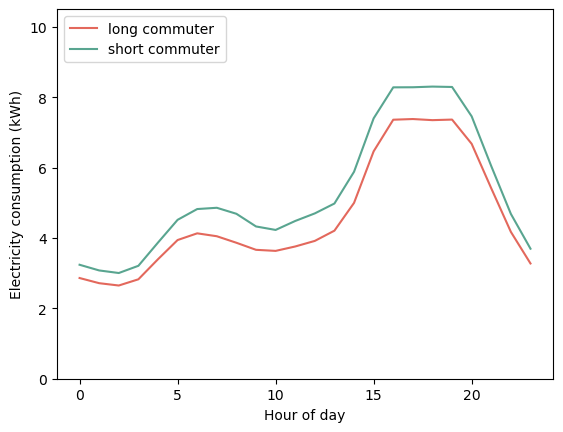

In [36]:
elec_new = pd.concat([elec_long,elec_short])
custom_palette = {"long commuter":sns.color_palette("flare")[1],
                   "short commuter":sns.color_palette("crest")[1]}
sns.lineplot(data = elec_new,x='Hour',y='Electricity:Facility [J](TimeStep)',hue='category', palette=custom_palette,ci=None)
plt.ylim(0,10.5)
plt.ylabel('Electricity consumption (kWh)')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.xlabel('Hour of day')

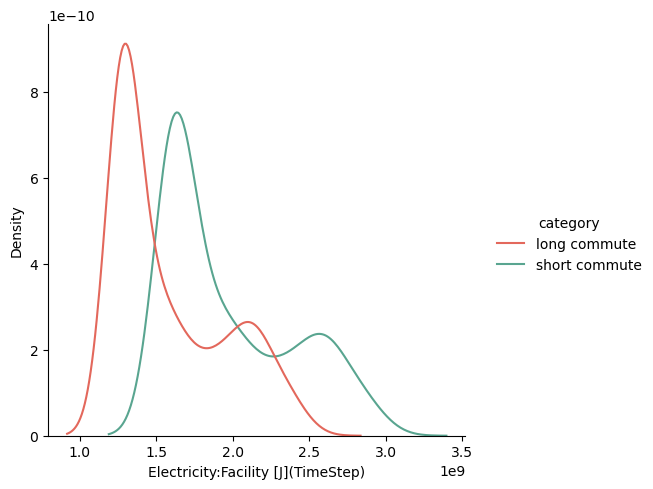

In [122]:
# calculate daily total
daily_tot = elec_new.groupby(['Month','Day','category']).agg({'Electricity:Facility [J](TimeStep)':'sum',
                                                         'NaturalGas:Facility [J](TimeStep)':'sum'}).reset_index()
sns.displot(daily_tot, x = 'Electricity:Facility [J](TimeStep)', kind="kde", bw_adjust=1,hue='category', palette=custom_palette)

<Axes: xlabel='Month', ylabel='Hour'>

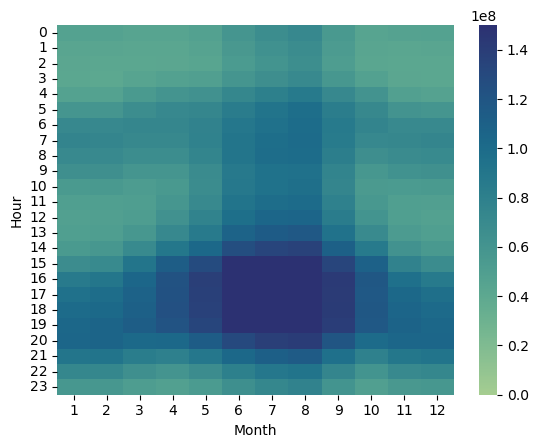

In [123]:
month_avg = elec_new.groupby(['Month','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
heatmap_df = month_avg[month_avg.category == 'short commute']
heatmap_df = heatmap_df.pivot(index="Hour", columns="Month", values='Electricity:Facility [J](TimeStep)')
sns.heatmap(heatmap_df, cmap="crest", vmin=0, vmax=1.5e8)

<Axes: xlabel='Month', ylabel='Hour'>

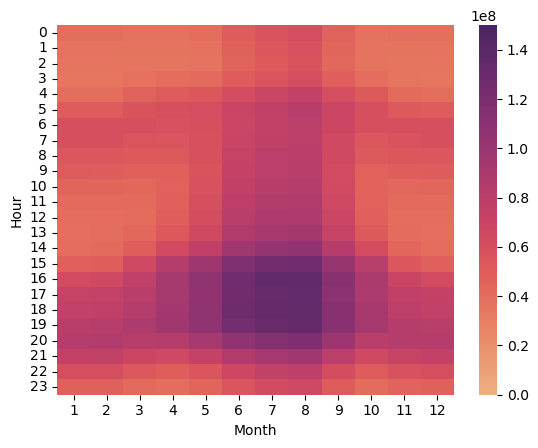

In [124]:
month_avg = elec_new.groupby(['Month','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
heatmap_df = month_avg[month_avg.category == 'long commute']
heatmap_df = heatmap_df.pivot(index="Hour", columns="Month", values='Electricity:Facility [J](TimeStep)')
sns.heatmap(heatmap_df, cmap="flare", vmin=0, vmax=1.5e8)

# Old

In [37]:
out_dir = out_dir_old
k = 1
files = os.listdir(out_dir)
files = [file for file in files if file.endswith("mtr.feather")]
for f in files:
    i = int(f[0:13])
    if i in long_commute_ID: 
        elec_tmp = pd.read_feather(out_dir+str(i)+'mtr.feather')
        if k == 1:
            elec_all = elec_tmp.copy()
            elec_all = elec_all[['Date/Time','Month','Day','Hour','Electricity:Facility [J](TimeStep)','NaturalGas:Facility [J](TimeStep)']]
        else:
            elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']+elec_tmp['Electricity:Facility [J](TimeStep)']
            elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']+elec_tmp['NaturalGas:Facility [J](TimeStep)']
        k = k + 1
        print(k)
elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['category'] = 'long commuter' 
elec_all = elec_all.groupby(['Month','Day','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_all = elec_all.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_long_orig = elec_all.copy()
elec_long_orig.head()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,0,long commuter,2.798778,2.995682
1,1,long commuter,2.641720,3.230350
2,2,long commuter,2.572470,3.428725
3,3,long commuter,2.764979,3.600848
4,4,long commuter,3.399530,3.647982


In [38]:
out_dir = out_dir_old
k = 1
files = os.listdir(out_dir)
files = [file for file in files if file.endswith("mtr.feather")]
for f in files:
    i = int(f[0:13])
    if i in short_commute_ID: 
        elec_tmp = pd.read_feather(out_dir+str(i)+'mtr.feather')
        if k == 1:
            elec_all = elec_tmp.copy()
            elec_all = elec_all[['Date/Time','Month','Day','Hour','Electricity:Facility [J](TimeStep)','NaturalGas:Facility [J](TimeStep)']]
        else:
            elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']+elec_tmp['Electricity:Facility [J](TimeStep)']
            elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']+elec_tmp['NaturalGas:Facility [J](TimeStep)']
        k = k + 1
        print(k)
elec_all['Electricity:Facility [J](TimeStep)'] = elec_all['Electricity:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['NaturalGas:Facility [J](TimeStep)'] = elec_all['NaturalGas:Facility [J](TimeStep)']/(k-1)/(3.6 * 10**6)
elec_all['category'] = 'short commuter' # short commute
elec_all = elec_all.groupby(['Month','Day','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_all = elec_all.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
elec_short_orig = elec_all.copy()
elec_short_orig.head()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,0,short commuter,3.211993,2.856252
1,1,short commuter,3.033416,3.077520
2,2,short commuter,2.955656,3.264252
3,3,short commuter,3.183384,3.433400
4,4,short commuter,3.926099,3.480417


Text(0.5, 0, 'Hour of day')

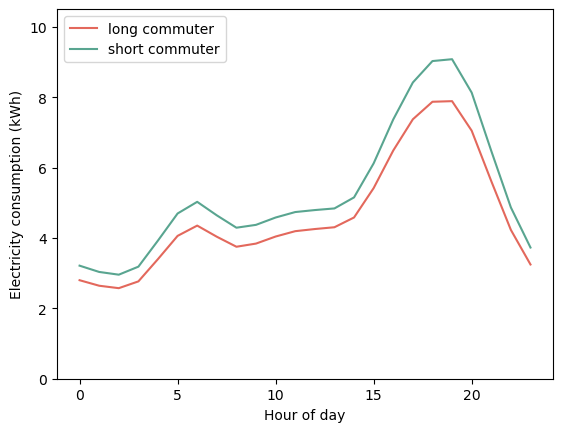

In [39]:
elec_orig = pd.concat([elec_long_orig,elec_short_orig])
sns.lineplot(data = elec_orig,x='Hour',y='Electricity:Facility [J](TimeStep)',hue='category', palette=custom_palette,ci=None)
plt.ylim(0,10.5)
plt.ylabel('Electricity consumption (kWh)')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.xlabel('Hour of day')

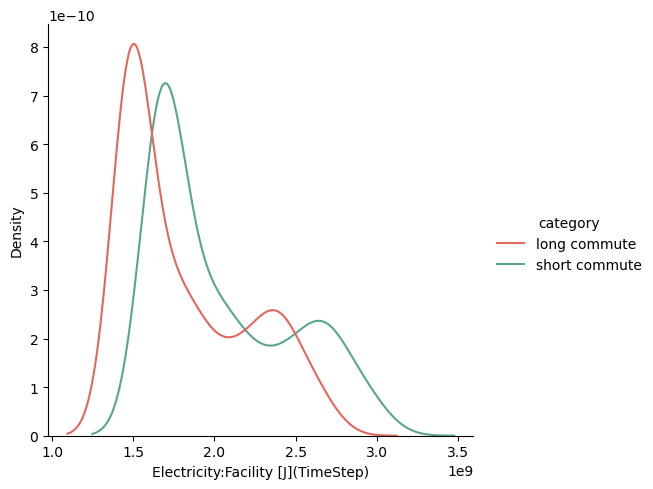

In [128]:
# calculate daily total
daily_tot = elec_orig.groupby(['Month','Day','category']).agg({'Electricity:Facility [J](TimeStep)':'sum',
                                                         'NaturalGas:Facility [J](TimeStep)':'sum'}).reset_index()
sns.displot(daily_tot, x = 'Electricity:Facility [J](TimeStep)', kind="kde", bw_adjust=1,hue='category', palette=custom_palette)

<Axes: xlabel='Month', ylabel='Hour'>

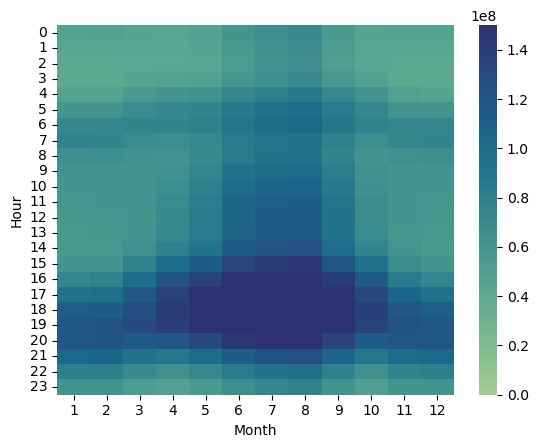

In [129]:
month_avg = elec_orig.groupby(['Month','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
heatmap_df = month_avg[month_avg.category == 'short commute']
heatmap_df = heatmap_df.pivot(index="Hour", columns="Month", values='Electricity:Facility [J](TimeStep)')
sns.heatmap(heatmap_df, cmap="crest", vmin=0, vmax=1.5e8)

<Axes: xlabel='Month', ylabel='Hour'>

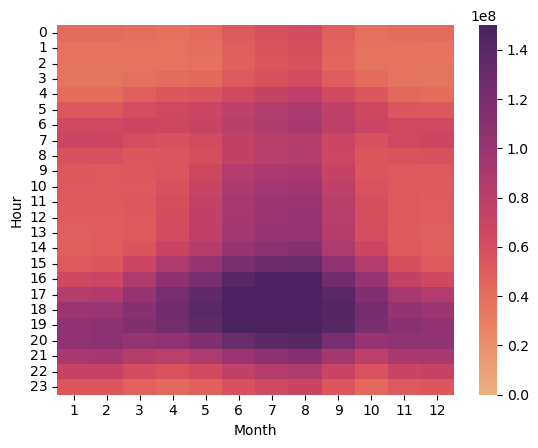

In [130]:
month_avg = elec_orig.groupby(['Month','Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean',
                                                         'NaturalGas:Facility [J](TimeStep)':'mean'}).reset_index()
heatmap_df = month_avg[month_avg.category == 'long commute']
heatmap_df = heatmap_df.pivot(index="Hour", columns="Month", values='Electricity:Facility [J](TimeStep)')
sns.heatmap(heatmap_df, cmap="flare", vmin=0, vmax=1.5e8)

# Comparison new old

In [131]:
elec_new.head()

,Month,Day,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,1,1,0,long commute,3.829598e+07,1.158578e+08
1,1,1,1,long commute,3.631189e+07,6.925080e+07
2,1,1,2,long commute,3.496352e+07,6.516309e+07
3,1,1,3,long commute,3.503371e+07,6.788633e+07
4,1,1,4,long commute,3.902211e+07,6.347327e+07


In [132]:
long = elec_new.loc[elec_new.category == 'long commute','Electricity:Facility [J](TimeStep)']
short = elec_new.loc[elec_new.category == 'short commute','Electricity:Facility [J](TimeStep)']
from scipy import stats
t_statistic, p_value = stats.ttest_ind(long, short)
# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -36.74876331938947
P-Value: 7.169206004916892e-285


In [133]:
elec_orig.head()

,Month,Day,Hour,category,Electricity:Facility [J](TimeStep),NaturalGas:Facility [J](TimeStep)
0,1,1,0,long commute,4.034365e+07,1.106622e+08
1,1,1,1,long commute,3.748584e+07,6.652166e+07
2,1,1,2,long commute,3.613585e+07,6.259200e+07
3,1,1,3,long commute,3.620544e+07,6.532157e+07
4,1,1,4,long commute,4.035855e+07,6.061751e+07


In [134]:
long = elec_orig.loc[elec_orig.category == 'long commute','Electricity:Facility [J](TimeStep)']
short = elec_orig.loc[elec_orig.category == 'short commute','Electricity:Facility [J](TimeStep)']
from scipy import stats
t_statistic, p_value = stats.ttest_ind(long, short)
# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -18.5821893195063
P-Value: 2.425340204609798e-76


In [144]:
new = elec_new.loc[(elec_new.category == 'short commute')&(elec_new.Hour.isin([7,8,14,15,16])),'Electricity:Facility [J](TimeStep)']
orig = elec_orig.loc[(elec_orig.category == 'short commute')&(elec_orig.Hour.isin([7,8,14,15,16])),'Electricity:Facility [J](TimeStep)']
t_statistic, p_value = stats.ttest_ind(new, orig, alternative='greater')
# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 6.575399650755733
P-Value: 2.7710767015871978e-11


In [146]:
new = elec_new.loc[(elec_new.category == 'long commute')&(elec_new.Hour.isin([10,11,12])),'Electricity:Facility [J](TimeStep)']
orig = elec_orig.loc[(elec_orig.category == 'long commute')&(elec_orig.Hour.isin([10,11,12])),'Electricity:Facility [J](TimeStep)']
t_statistic, p_value = stats.ttest_ind(new, orig, alternative='less')
# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -13.639091603042848
P-Value: 5.15689699283584e-41


In [147]:
new = elec_new.loc[(elec_new.category == 'long commute')&(elec_new.Hour.isin([6,18,19])),'Electricity:Facility [J](TimeStep)']
orig = elec_orig.loc[(elec_orig.category == 'long commute')&(elec_orig.Hour.isin([6,18,19])),'Electricity:Facility [J](TimeStep)']
t_statistic, p_value = stats.ttest_ind(new, orig, alternative='less')
# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -17.288097582293577
P-Value: 3.590709171964284e-63


In [137]:
elec_combo = pd.merge(elec_new,elec_orig,on=['Month','Day','Hour','category'], suffixes=('_new', '_orig'))
elec_combo['Electricity:Facility [J](TimeStep)_new'] = elec_combo['Electricity:Facility [J](TimeStep)_new']/elec_combo['Electricity:Facility [J](TimeStep)_orig']
elec_combo.head()

,Month,Day,Hour,category,Electricity:Facility [J](TimeStep)_new,NaturalGas:Facility [J](TimeStep)_new,Electricity:Facility [J](TimeStep)_orig,NaturalGas:Facility [J](TimeStep)_orig
0,1,1,0,long commute,0.949244,1.158578e+08,4.034365e+07,1.106622e+08
1,1,1,1,long commute,0.968683,6.925080e+07,3.748584e+07,6.652166e+07
2,1,1,2,long commute,0.967558,6.516309e+07,3.613585e+07,6.259200e+07
3,1,1,3,long commute,0.967637,6.788633e+07,3.620544e+07,6.532157e+07
4,1,1,4,long commute,0.966886,6.347327e+07,4.035855e+07,6.061751e+07


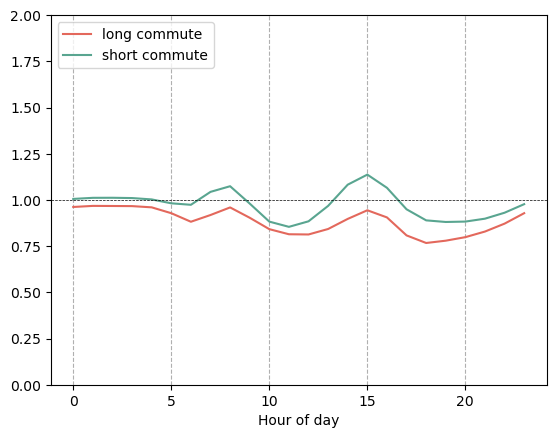

In [138]:
sns.lineplot(data = elec_combo,x='Hour',y='Electricity:Facility [J](TimeStep)_new',hue='category', palette=custom_palette,ci=None)
plt.axhline(y=1, color='black', linestyle='--', linewidth=0.5)
plt.ylim(0,2)
plt.ylabel('')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.xlabel('Hour of day')
plt.grid(axis='x', linestyle='--', which='both')

plt.show()

In [139]:
elec_new_mean = elec_new.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean'}).reset_index()
peak_new_long = elec_new_mean.loc[(elec_new_mean.Hour==19)&(elec_new_mean.category=='long commute'),'Electricity:Facility [J](TimeStep)'].values[0]
peak_new_short = elec_new_mean.loc[(elec_new_mean.Hour==19)&(elec_new_mean.category=='short commute'),'Electricity:Facility [J](TimeStep)'].values[0]
(peak_new_long-peak_new_short)/peak_new_long

-0.2591713831272992

In [140]:
elec_orig_mean = elec_orig.groupby(['Hour','category']).agg({'Electricity:Facility [J](TimeStep)':'mean'}).reset_index()
peak_orig_long = elec_orig_mean.loc[(elec_orig_mean.Hour==19)&(elec_orig_mean.category=='long commute'),'Electricity:Facility [J](TimeStep)'].values[0]
peak_orig_short = elec_orig_mean.loc[(elec_orig_mean.Hour==19)&(elec_orig_mean.category=='short commute'),'Electricity:Facility [J](TimeStep)'].values[0]
(peak_orig_long-peak_orig_short)/peak_orig_long

-0.11794738820824681

In [141]:
(peak_new_long-peak_orig_long)/peak_orig_long

-0.21678748185304106

In [142]:
(peak_new_short-peak_orig_short)/peak_orig_short

-0.1178486571373285